In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import load_model
from keras.applications import DenseNet121

In [3]:
conv_base=DenseNet121(
weights='imagenet',
include_top=False,
input_shape=(150,150,3)
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/clahe-plant-disease/New folder (2)/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)
valid=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/clahe-plant-disease/New folder (2)/Test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 18740 files belonging to 2 classes.
Found 1410 files belonging to 2 classes.


In [10]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [12]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [13]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),metrics=['accuracy'])

In [14]:
history=model.fit(train,epochs=15,validation_data=valid,callbacks=[callback])

Epoch 1/15


I0000 00:00:1712818637.952319      85 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712818638.120662      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.8953 - loss: 13.4703

W0000 00:00:1712818823.088126      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712818834.169656      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 353s 360ms/step - accuracy: 0.8954 - loss: 13.4672 - val_accuracy: 0.9830 - val_loss: 8.3703
Epoch 2/15


W0000 00:00:1712818848.928395      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 100s 170ms/step - accuracy: 0.9873 - loss: 7.1028 - val_accuracy: 0.9865 - val_loss: 4.0745
Epoch 3/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 99s 168ms/step - accuracy: 0.9957 - loss: 3.3696 - val_accuracy: 0.9943 - val_loss: 1.8165
Epoch 4/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 99s 169ms/step - accuracy: 0.9979 - loss: 1.4636 - val_accuracy: 0.9950 - val_loss: 0.7577
Epoch 5/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 99s 169ms/step - accuracy: 0.9992 - loss: 0.6030 - val_accuracy: 0.9965 - val_loss: 0.3201
Epoch 6/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 99s 169ms/step - accuracy: 0.9984 - loss: 0.2605 - val_accuracy: 0.9950 - val_loss: 0.1504
Epoch 7/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 99s 169ms/step - accuracy: 0.9989 - loss: 0.1110 - val_accuracy: 0.9965 - val_loss: 0.0574
Epoch 8/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 99s 169ms/step - accuracy: 0.9999 - loss: 0.0401 - val_accuracy: 0.9965 - val_loss: 0.0300
Epoch 9/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 99s 169ms/step - accuracy: 0.9994 - loss: 0.0161 - va

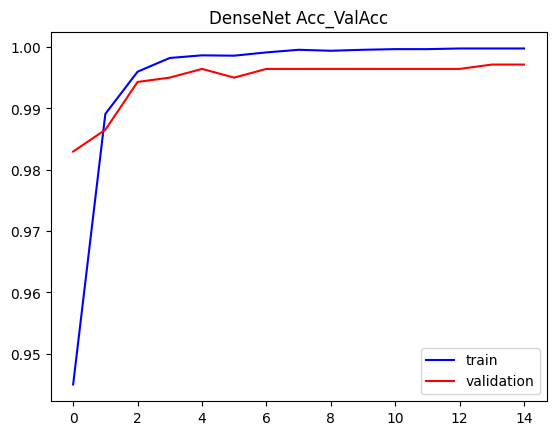

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.title("DenseNet Acc_ValAcc")
plt.legend()
plt.savefig('DenseNet_accuracy_history.png')
plt.show()

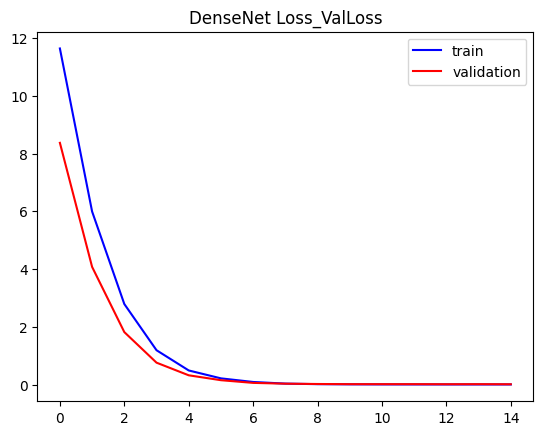

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color='blue',label='train')
plt.plot(history.history["val_loss"],color='red',label='validation')
plt.title("DenseNet Loss_ValLoss")
plt.legend()
plt.savefig('DenseNet_loss_history.png')
plt.show()

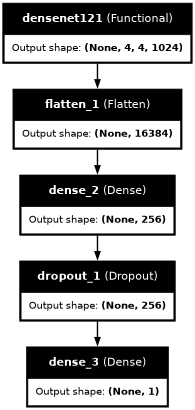

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=False, dpi=50, to_file='model.png')

In [22]:
import cv2

In [23]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG")

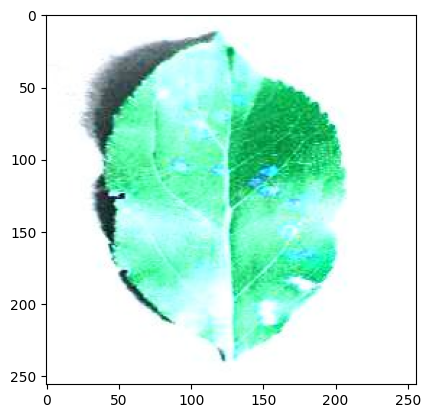

In [24]:
plt.imshow(test_img)

In [25]:
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)

In [26]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


array([[0.02696081]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.99990296]], dtype=float32)

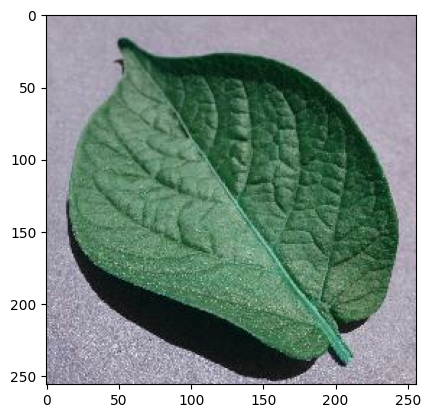

In [27]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/PotatoHealthy1.JPG")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.00096336]], dtype=float32)

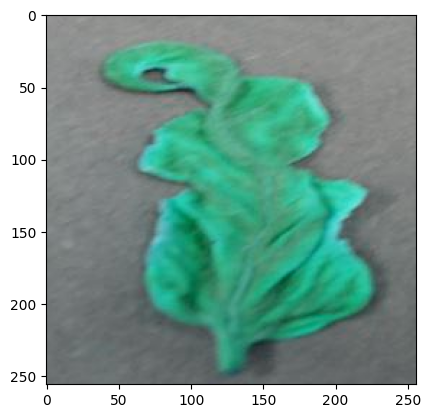

In [28]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus5.JPG")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.00289594]], dtype=float32)

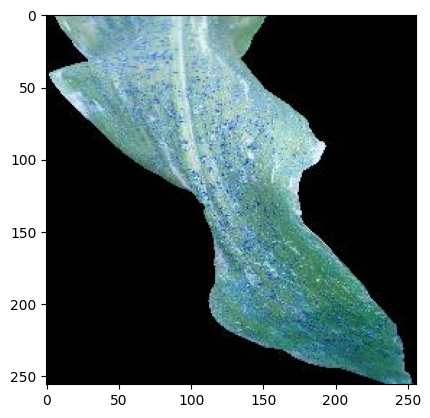

In [29]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/CornCommonRust3.JPG")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.00048802]], dtype=float32)

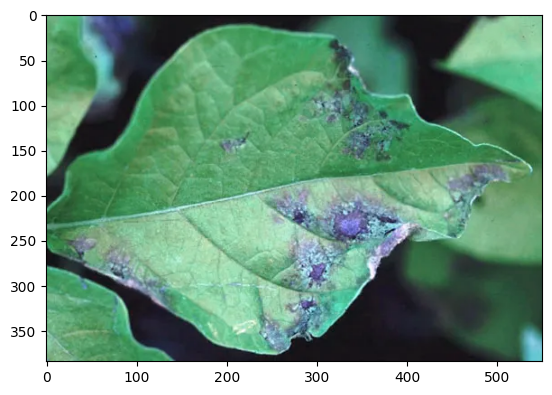

In [30]:
test_img=cv2.imread("/kaggle/input/himanshu1/Defected5.webp")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 4, 4, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,380,996 (85.38 MB)

 Trainable params: 11,148,673 (42.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

 Optimizer params: 11,148,675 (42.53 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.97056144]], dtype=float32)

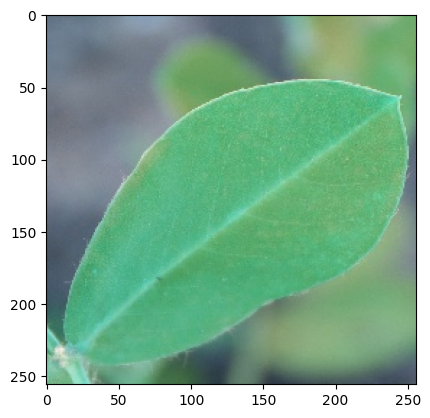

In [32]:
test_img=cv2.imread("/kaggle/input/groundnut/Groundnut_Leaf_dataset/test/healthy_leaf_1/40.jpg")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

409
3116
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step
test accuracy: 86.922 %




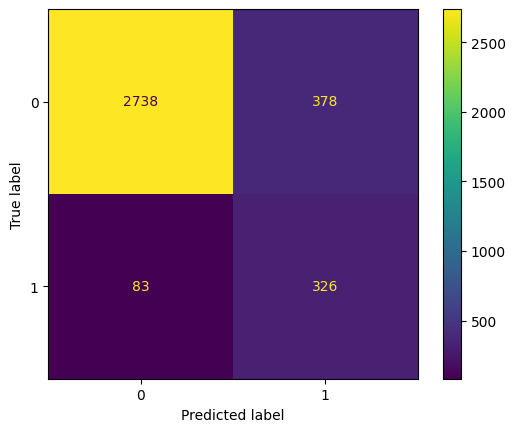

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3116
           1       0.46      0.80      0.59       409

    accuracy                           0.87      3525
   macro avg       0.72      0.84      0.75      3525
weighted avg       0.91      0.87      0.88      3525



In [41]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import os
path="/kaggle/input/groundnuttest/New folder/"
im_size=150
images=[]
labels=[]
leaf_types=os.listdir('/kaggle/input/groundnuttest/New folder/')
leaf_types
for i in leaf_types:
  data_path=path+str(i)
  filenames=[i for i in os.listdir(data_path)]
  print(len(filenames))
  #print(filenames)
  for f in filenames:
    img=cv2.imread(data_path+'/'+f)
    #print(img)
    img=cv2.resize(img,(im_size,im_size))
    images.append(img)
    labels.append(i)
import numpy as np
images=np.array(images)
#images=images.astype("float32")/255
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y=labels
l=LabelEncoder()
l.fit(["Defected","Healthy"])
list(l.classes_)
y=l.transform(y)
y_pr=model.predict(images)
y_p=(y_pr>0.33)
y_p=pd.DataFrame(y_p)
y_predict=np.where(y_p[0]==True,1,0)
test_accu = np.sum(y == y_predict) / len(y) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")
cm=confusion_matrix(y, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y, y_predict))

58
549
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
test accuracy: 83.3608 %




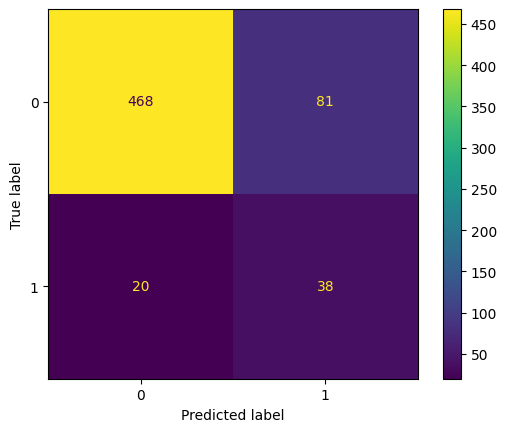

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       549
           1       0.32      0.66      0.43        58

    accuracy                           0.83       607
   macro avg       0.64      0.75      0.67       607
weighted avg       0.90      0.83      0.86       607



In [42]:
path="/kaggle/input/cirtustesting/New folder/"
im_size=150
images=[]
labels=[]
leaf_types=os.listdir('/kaggle/input/cirtustesting/New folder/')
leaf_types
for i in leaf_types:
  data_path=path+str(i)
  filenames=[i for i in os.listdir(data_path)]
  print(len(filenames))
  #print(filenames)
  for f in filenames:
    img=cv2.imread(data_path+'/'+f)
    #print(img)
    img=cv2.resize(img,(im_size,im_size))
    images.append(img)
    labels.append(i)
import numpy as np
images=np.array(images)
#images=images.astype("float32")/255
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y=labels
l=LabelEncoder()
l.fit(["Defected","Healthy"])
list(l.classes_)
y=l.transform(y)
y_pr=model.predict(images)
y_p=(y_pr>0.33)
y_p=pd.DataFrame(y_p)
y_predict=np.where(y_p[0]==True,1,0)
test_accu = np.sum(y == y_predict) / len(y) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")
cm=confusion_matrix(y, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y, y_predict))

In [35]:
model.evaluate(valid)

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9978 - loss: 0.0075


[0.00975874438881874, 0.9971631169319153]